In [33]:
import numpy as np
import pandas as pd

In [26]:
df=pd.read_csv('/content/Book1-_1_.csv')

In [27]:
df.head()

,Keywords,Date and Time,Source,Event ID,Task Category,Description
0,Audit Success,4/27/2024 13:44,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon._x000...
1,Audit Success,4/27/2024 13:44,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on._x000D_\...
2,Audit Success,4/27/2024 13:43,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...
3,Audit Success,4/27/2024 13:43,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...
4,Audit Success,4/27/2024 13:43,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...


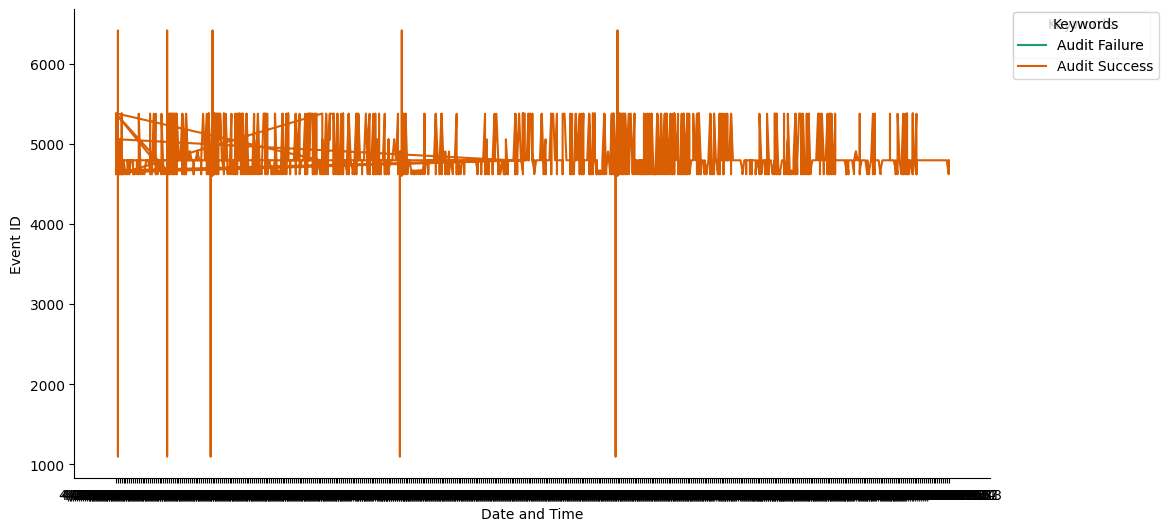

In [29]:
# @title Date and Time vs Event ID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date and Time']
  ys = series['Event ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date and Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Keywords')):
  _plot_series(series, series_name, i)
  fig.legend(title='Keywords', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date and Time')
_ = plt.ylabel('Event ID')

In [30]:
df.tail()

,Keywords,Date and Time,Source,Event ID,Task Category,Description
26785,Audit Success,4/25/2024 7:48,Microsoft-Windows-Security-Auditing,4907,Audit Policy Change,Auditing settings on object were changed._x000...
26786,Audit Success,4/25/2024 7:48,Microsoft-Windows-Security-Auditing,4907,Audit Policy Change,Auditing settings on object were changed._x000...
26787,Audit Success,4/25/2024 7:48,Microsoft-Windows-Security-Auditing,4907,Audit Policy Change,Auditing settings on object were changed._x000...
26788,Audit Success,4/25/2024 7:48,Microsoft-Windows-Security-Auditing,4907,Audit Policy Change,Auditing settings on object were changed._x000...
26789,Audit Success,4/25/2024 7:48,Microsoft-Windows-Security-Auditing,4907,Audit Policy Change,Auditing settings on object were changed._x000...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26790 entries, 0 to 26789
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Keywords       26790 non-null  object
 1   Date and Time  26790 non-null  object
 2   Source         26790 non-null  object
 3   Event ID       26790 non-null  int64 
 4   Task Category  26790 non-null  object
 5   Description    26790 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [32]:
df.shape

(26790, 6)

In [ ]:

from nltk.tokenize import word_tokenize

# Assuming df is your DataFrame with a 'Description' column
# For example:
# df = pd.DataFrame({'Description': ['Auditing settings on object were changed with crypto key', 'Another description without crypto or key']})

# Tokenize the 'Description' column
df['Tokenized_Description'] = df['Description'].apply(word_tokenize)

# Check for occurrences of 'crypto' and 'key' in the tokenized descriptions
df['Contains_Crypto'] = df['Tokenized_Description'].apply(lambda x: 'crypto' in x)
df['Contains_Key'] = df['Tokenized_Description'].apply(lambda x: 'key' in x)

# Filter the DataFrame to select rows where both 'crypto' and 'key' are found
crypto_key_df = df[df['Contains_Crypto'] & df['Contains_Key']]

# Display the rows where 'crypto' and 'key' are found in the 'Description' column
if not crypto_key_df.empty:
    print("Occurrences of 'crypto' and 'key' found in the 'Description' column:")
    print(crypto_key_df)
else:
    print("No occurrences of 'crypto' and 'key' found in the 'Description' column.")




In [38]:

crypto_key_events = df[df['Description'].str.contains('crypto|key', case=False, regex=True)]['Event ID']

# Print the Event IDs where 'crypto' or 'key' is found
if not crypto_key_events.empty:
    print("Event IDs where 'crypto' or 'key' is found in the 'Description' column:")
    print(crypto_key_events)
else:
    print("No occurrences of 'crypto' or 'key' found in the 'Description' column.")


Event IDs where 'crypto' or 'key' is found in the 'Description' column:
1        4624
47       4624
48       4624
51       5059
52       5059
         ... 
26323    4907
26394    4907
26395    4907
26506    4907
26507    4907
Name: Event ID, Length: 1523, dtype: int64


In [ ]:
df['Keywords']

Audit Success    27-04-2024 10:58:33
Audit Success    27-04-2024 10:58:33
Audit Success    27-04-2024 10:58:33
Audit Success    27-04-2024 10:58:33
Audit Success    27-04-2024 10:58:33
                        ...         
Audit Success    25-04-2024 07:48:10
Audit Success    25-04-2024 07:48:10
Audit Success    25-04-2024 07:48:10
Audit Success    25-04-2024 07:48:10
Audit Success    25-04-2024 07:48:10
Name: Keywords, Length: 26517, dtype: object